# Deterministic RNNs in SSM

To fit the distributional notation of SSM-JAX, deterministic RNNs return _deterministic_ distributions over the output values.

This is accomplished by using the Tensorflow Probability `Deterministic` distribution.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax.numpy as np
import jax.random as jr


from ssm.rnn import GRU

In [3]:
from matplotlib.gridspec import GridSpec 
import matplotlib.pyplot as plt

def plot_emissions(states, data):
    latent_dim = states.shape[-1]
    emissions_dim = data.shape[-1]
    num_timesteps = data.shape[0]
    
    plt.figure(figsize=(8, 6))
    gs = GridSpec(2, 1, height_ratios=(1, emissions_dim / latent_dim))

    lim = abs(states).max()
    plt.subplot(gs[0])
    for d in range(latent_dim):
        plt.plot(states[:, d] + lim * d, '-')
    plt.yticks(np.arange(latent_dim) * lim, ["$x_{}$".format(d+1) for d in range(latent_dim)])
    plt.xticks([])
    plt.xlim(0, num_timesteps)
    plt.title("Sampled Latent States")

    lim = abs(data).max()
    plt.subplot(gs[1])
    for n in range(emissions_dim):
        plt.plot(data[:, n] - lim * n, '-k')
    plt.yticks(-np.arange(emissions_dim) * lim, ["$y_{{ {} }}$".format(n+1) for n in range(emissions_dim)])
    plt.xlabel("time")
    plt.xlim(0, num_timesteps)

    plt.title("Sampled Emissions")
    plt.tight_layout()

In [4]:
num_input_dims = 5
num_latent_dims = 3

rnn = GRU(num_input_dims, num_latent_dims, seed=jr.PRNGKey(0))

In [5]:
seed_1, seed_2 = jr.split(jr.PRNGKey(0))
num_timesteps = 100

inputs = jr.normal(seed_1, shape=(num_timesteps, num_input_dims))
states, data = rnn.sample(key=seed_2, covariates=inputs, num_steps=num_timesteps)

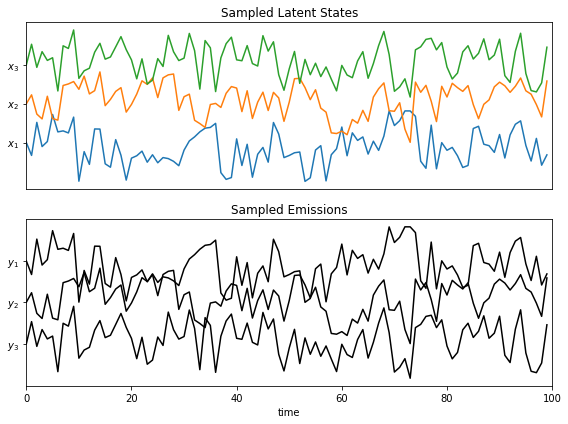

In [6]:
plot_emissions(states, data)

## Test Jit

In [7]:
import jax 

@jax.jit
def f(rnn):
    return rnn

f(rnn)